In [1]:
import tensorflow as tf

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import time
import random


from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

from IPython import display

from helper import *


In [2]:
raw_vedio_names = ["badboy.mp4","feel_special.mp4","kill_this_love.mp4","somi_birthday.mp4",
    "boombayah_blackpink.mp4","flower_shower.mp4","magnetic_moon_tiffany_young.mp4","sunmi_lalalay.mp4",
    "clc_me.mp4","fromis_9_fun.mp4","mamamoo_hip.mp4","swalla.mp4",
    "dumb_litty.mp4","gfriend_fever.mp4","red_velvet_umpah_umpah.mp4","vav_poison.mp4",
    "everglow_adios.mp4","gi_dle_uh_oh.mp4","red_velvet_zimzalabim.mp4","wjsn_boogie_up.mp4",
    "exid_me_and_you.mp4","jopping.mp4","snapping_chung_ha.mp4"]
vedio_names = []
for raw_vedio_name in raw_vedio_names:
    vedio_names.append(raw_vedio_name.split(".")[0])

In [36]:
x_max = 640
y_max = 320
def normalized(array):
    array = (array - [x_max / 2, y_max / 2]) / [x_max / 4, y_max / 4]
    return array

def denormalized(array):
    array = array * [x_max / 2, y_max / 2] + [x_max / 4, y_max / 4]
    return array

In [37]:
a = [i for i in range(3)]
print(a)

[0, 1, 2]


In [48]:
frame_per_sec = 20
truncate_sec=10
trunk_len = int(frame_per_sec * truncate_sec)
y_input_dim = 12
#(frame, example, input )

def get_array_trunks(x):
    return [x[(i*trunk_len):(i*trunk_len+trunk_len)] for i in range(int(len(x)/trunk_len))]

def get_normalized_flattened_reshaped_x(vedio_name):
    x = get_frames(vedio_name)
    print(len(x))
    x_arry =get_array_trunks(x)
    output = None
    for x_sliced in x_arry:
        formatted_x = format_x(x_sliced)
        if formatted_x is not None:
            if output is None:
                output = formatted_x
            else:
                output = np.append(output,formatted_x,axis=1)
    print("output",output.shape)
    return output

def format_x(x):
    if len(x) != trunk_len:
        print("time frame not long enough")
        return None
    x = np.array(x)
    x = normalized(x)
    x_flattened = x.reshape(x.shape[0], -1)
    assert(x_flattened.shape[1] == 50)
    x_reshape = np.reshape(x_flattened, (x_flattened.shape[0],1,x_flattened.shape[1]))
    return x_reshape
    
def get_sliced_normalized_flattened_reshaped_x(x):
    x = get_frames(vedio_name)
    x = np.array(x)
    x = normalized(x)
    print("original x shape:",x.shape)
    x_flattened = x.reshape(x.shape[0], -1)
    assert(x_flattened.shape[1] == 50)
    #print("x_flattened shape:",x_flattened.shape)
    x_reshape = np.reshape(x_flattened, (x_flattened.shape[0],1,x_flattened.shape[1]))
    return x_reshape
    
sample_x = get_normalized_flattened_reshaped_x("badboy")

def get_fake_y(real_y):
    return np.random.random_sample((real_y.shape[0],y_input_dim))

    
def get_y(vedio_name):
    y = get_feature_np_array(vedio_name)
    #y = get_fake_y(y)
    y_array= get_array_trunks(y)
    output = None
    for y_sliced in y_array:
        formatted_y = format_y(y_sliced)
        if formatted_y is not None:
            if output is None:
                output = formatted_y
            else:
                output = np.append(output,formatted_y,axis=1)
    print("output y",output.shape)
    return output

def format_y(y):
    if len(y) != trunk_len:
        print("time frame not long enough")
        return None
    y = np.array(y)
    y_reshape = np.reshape(y, (y.shape[0],1,y_input_dim))
    assert(y_reshape.shape[0] == trunk_len)
    y_reshape = y_reshape.astype(np.float32)
    #print("y_reshape",y_reshape.shape)
    return y_reshape

sample_y = get_y("badboy")

print("sample_x array shape is ", sample_x[0].shape)
print("sample_y array shape is ", sample_y[0].shape)

x_raw = []
y_raw = []
random.shuffle(vedio_names)
for vedio_name in vedio_names:
    x = get_normalized_flattened_reshaped_x(vedio_name)
    y = get_y(vedio_name)
    x_raw.append(x)
    y_raw.append(y)


print("x_raw len:",x)

#print("x_raw shape",x_raw.shape)
#print("y_raw shape",y_raw.shape)

4131
output (200, 20, 50)
output y (200, 20, 12)
sample_x array shape is  (20, 50)
sample_y array shape is  (20, 12)
3694
output (200, 18, 50)
output y (200, 18, 12)
3876
output (200, 19, 50)
output y (200, 19, 12)
4931
output (200, 24, 50)
output y (200, 24, 12)
4390
output (200, 21, 50)
output y (200, 21, 12)
3675
output (200, 18, 50)
output y (200, 18, 12)
3726
output (200, 18, 50)
output y (200, 18, 12)
4105
output (200, 20, 50)
output y (200, 20, 12)
2023
output (200, 10, 50)
output y (200, 10, 12)
3990
output (200, 19, 50)
output y (200, 19, 12)
3426
output (200, 17, 50)
output y (200, 17, 12)
4294
output (200, 21, 50)
output y (200, 21, 12)
4485
output (200, 22, 50)
output y (200, 22, 12)
3773
output (200, 18, 50)
output y (200, 18, 12)
3751
output (200, 18, 50)
output y (200, 18, 12)
4201
output (200, 21, 50)
output y (200, 21, 12)
4209
output (200, 21, 50)
output y (200, 21, 12)
3630
output (200, 18, 50)
output y (200, 18, 12)
3957
output (200, 19, 50)
output y (200, 19, 12)
3

In [42]:
print("x_raw[0].shape",x_raw[0].shape)

x_raw[0].shape (200, 20, 50)


In [56]:
def compute_lamb_pair_len(one_pose): 
    key_piont_pairs = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[8,12],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
    pair_len = np.zeros((len(key_piont_pairs),1))
    for i in range(len(key_piont_pairs)):
        pair_len[i] = np.linalg.norm(one_pose[key_piont_pairs[i][0]] - one_pose[key_piont_pairs[i][1]])
    return pair_len

def get_avg_lamb_len(x):
    key_piont_pairs = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[8,12],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
    x_poins = x.reshape(-1,25,2)
    pair_len = np.zeros((len(key_piont_pairs),1))
    #for i in range(len(key_piont_pairs)):
    #    for one_pose in x_poins:
    #        pair_len[i] += np.linalg.norm(one_pose[key_piont_pairs[i][0]] - one_pose[key_piont_pairs[i][1]])
    for one_pose in x_poins: 
        pair_len += compute_lamb_pair_len(one_pose)       
    
    pair_len = pair_len/x_poins.shape[0]
    return pair_len

print(get_avg_lamb_len(x_raw[0]))
print(get_avg_lamb_len(x_raw[1]))

AVG_PAIR_LEN = get_avg_lamb_len(x_raw[0])

def total_

def one_pose_lamb_loss(one_pose_flat_x,avg_lamb_len):
    one_pose = one_pose_flat_x.reshape(25,2)
    one_pose_pair_lens = compute_lamb_pair_len(one_pose)
    return sum(abs(one_pose_pair_lens - AVG_PAIR_LEN))
    
    

[[0.35432961]
 [0.09901419]
 [0.33285973]
 [0.26679415]
 [0.09761985]
 [0.32437244]
 [0.27842487]
 [0.70419232]
 [0.0695621 ]
 [0.5918876 ]
 [0.63186838]
 [0.07118316]
 [0.20042476]
 [0.09495626]
 [0.06781782]
 [0.5955009 ]
 [0.59926821]
 [0.10765329]
 [0.2418544 ]
 [0.06712002]
 [0.07267209]
 [0.08382029]
 [0.42225576]
 [0.30646411]]
[[0.32307992]
 [0.09654091]
 [0.31655242]
 [0.30327383]
 [0.09569777]
 [0.32645721]
 [0.34397493]
 [0.7118098 ]
 [0.0684548 ]
 [0.60353968]
 [0.53229803]
 [0.05194771]
 [0.18712279]
 [0.10008936]
 [0.06880331]
 [0.59406554]
 [0.54457405]
 [0.06570672]
 [0.18652113]
 [0.07913625]
 [0.06951293]
 [0.08594354]
 [0.31502806]
 [0.30505689]]


In [39]:
def get_more_examples(input_x,input_y,truncate_sec=10,frame_per_sec = 20):
    new_x_raw = []
    new_y_raw = []

        
    return new_x_raw
        
        
    

In [40]:
def make_generator_model():
    model = tf.keras.Sequential()

    model.add(layers.LSTM(256, input_shape=(None,y_input_dim),return_sequences=True))
    #model.add(layers.LeakyReLU())
    #model.add(layers.Dense(512))
    #model.add(layers.LeakyReLU())
    model.add(layers.Dense(50))
    #model.add(layers.LeakyReLU())
    #print(model.output_shape)
    #assert model.output_shape == (50)
    
    return model

def make_discriminator_model():
    model = tf.keras.Sequential()
    
    model.add(layers.LSTM(128,input_shape=(None,50),return_sequences=False))
    
    #model.add(layers.Flatten())
    model.add(layers.Dense(50))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(32))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(1))

    return model

In [15]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def limb_loss(fake_output,key_poss_output):
    print(fake_output.shape)
    
    
    
    

def generator_loss(fake_output):
    print("fake output shape:",fake_output.shape)
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [16]:
generator = make_generator_model()

noise = tf.random.normal((100, 1, y_input_dim))
generated_frame = generator(noise, training=False)
print(generated_frame)

Tensor("sequential_3/dense_7/BiasAdd:0", shape=(100, 1, 50), dtype=float32)


In [17]:
discriminator = make_discriminator_model()
decision = discriminator(generated_frame)
print (decision)
print(make_discriminator_model().output_shape)

Tensor("sequential_4/dense_10/BiasAdd:0", shape=(100, 1), dtype=float32)
(None, 1)


In [18]:
gen_input = tf.placeholder(tf.float32, shape=[None, None, y_input_dim], name='input_noise')
disc_input = tf.placeholder(tf.float32, shape=[None, None, 50], name='disc_input')

# Build Generator Network
gen_sample = generator(gen_input)

# Build 2 Discriminator Networks (one from noise input, one from generated samples)
real_output = discriminator(disc_input, training=True)
fake_output = discriminator(gen_sample, training=True)
        
# Build Loss
gen_loss = generator_loss(fake_output)
disc_loss = discriminator_loss(real_output, fake_output)

# Build Optimizers
generator_optimizer = tf.train.AdamOptimizer(1e-4)
discriminator_optimizer = tf.train.AdamOptimizer(1e-4)

# Create training operations
train_gen = generator_optimizer.minimize(gen_loss, var_list=generator.trainable_variables)
train_disc = discriminator_optimizer.minimize(disc_loss, var_list=discriminator.trainable_variables)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

fake output shape: (?, 1)


In [19]:
#print((np.array(y_raw[:,0,:]).reshape(200,1,1)).shape)

In [20]:
generated_frame = generator(y_raw[0], training=False)
print(generated_frame)


EPOCHS = 100

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)


Tensor("sequential_3_2/dense_7/BiasAdd:0", shape=(200, 21, 50), dtype=float32)


In [30]:
generator.save_weights('a_save_generator_check_point')
#latest = tf.train.latest_checkpoint('a_save_check_point')
discriminator.save_weights('a_save_discriminator_check_point')
#generator.load_weights('a_save_check_point')


In [31]:
def train(sess, x, y, gen_disc_ratio, epochs):
    generator.load_weights('a_save_generator_check_point')
    discriminator.load_weights('a_save_discriminator_check_point')
    for epoch in range(epochs):
        start = time.time()
        for i in range(len(x)):
            feed_dict = {disc_input: x[i], gen_input: y[i]}
            for i in range(gen_disc_ratio):
                _, gl = sess.run([train_gen, gen_loss], feed_dict=feed_dict)
            _, dl = sess.run([train_disc, disc_loss], feed_dict=feed_dict)
        gls.append(gl)
        dls.append(dl)
        if(epoch % 10 == 0): 
            print ('Time for epoch {} is {} sec'.format(epoch, time.time()-start))
            print ('  generator loss: {}, discriminator loss: {}'.format(gl, dl))
            generator.save_weights('a_save_generator_check_point')
            discriminator.save_weights('a_save_discriminator_check_point')


In [32]:
sess = tf.Session()
init_op = tf.global_variables_initializer()

sess.run(init_op)

gls = []
dls = []

Time for epoch 0 is 6.442341089248657 sec
  generator loss: 0.25747063755989075, discriminator loss: 1.8822166919708252
Time for epoch 10 is 3.861013174057007 sec
  generator loss: 0.5269296169281006, discriminator loss: 1.2370247840881348
Time for epoch 20 is 3.8587045669555664 sec
  generator loss: 0.6370363235473633, discriminator loss: 1.0205967426300049
Time for epoch 30 is 3.8490147590637207 sec
  generator loss: 1.1317960023880005, discriminator loss: 0.6094135046005249
Time for epoch 40 is 3.868420124053955 sec
  generator loss: 0.6896951198577881, discriminator loss: 0.7501372694969177
Time for epoch 50 is 3.887645959854126 sec
  generator loss: 0.5707336068153381, discriminator loss: 1.5446057319641113
Time for epoch 60 is 3.8730826377868652 sec
  generator loss: 0.9453599452972412, discriminator loss: 1.4527873992919922
Time for epoch 70 is 3.8641679286956787 sec
  generator loss: 0.9361749887466431, discriminator loss: 1.4546905755996704
Time for epoch 80 is 3.8505790233612

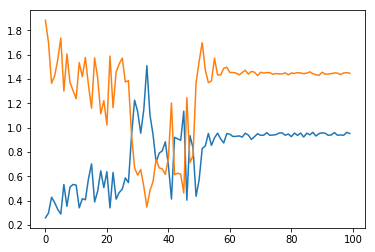

In [33]:
train(sess, x_raw, y_raw, 3, EPOCHS)

plt.plot(gls)
plt.plot(dls)
plt.show()

In [43]:
generated_frame = generator((np.array(y_raw[0][:,0,:]).reshape(200,1,12)), training=False)
#discriminator_out = discriminator(((np.array(x_raw[0][:,0,:])).reshape(200,1,50)), training=False)
print(generated_frame)
print("generated_frame.shape",generated_frame.shape)


#gen_output, disc_output = sess.run([generated_frame, discriminator_out])
[gen_output] = sess.run([generated_frame])
print(len(gen_output))
gen_output = np.reshape(gen_output, (gen_output.shape[0], gen_output.shape[2]))
gen_output = np.reshape(gen_output, (gen_output.shape[0], 25, 2))
print(denormalized(gen_output))
print(np.sum(gen_output))
#print("disc_output",disc_output)
#print(np.sum(disc_output)/disc_output.shape[0])
denormalized_gen_output = denormalized(gen_output)
print(denormalized_gen_output.shape)


Tensor("sequential_3_3/dense_7/BiasAdd:0", shape=(200, 1, 50), dtype=float32)
generated_frame.shape (200, 1, 50)
200
[[[137.79066563  43.13565016]
  [182.10962296 100.16556263]
  [154.917202    74.65720654]
  ...
  [159.50859189 189.23559189]
  [103.46777916 189.03971672]
  [118.60559464 182.77231216]]

 [[139.08688545  47.27092981]
  [179.81834531  97.98301339]
  [154.60448503  75.04401684]
  ...
  [159.37932551 175.80152512]
  [108.20391655 177.36505508]
  [123.54505777 170.01587868]]

 [[139.12808895  47.33210802]
  [179.76003289  98.00424218]
  [154.7027576   75.0292632 ]
  ...
  [159.36123073 175.61355591]
  [108.26672077 177.28802681]
  [123.61726999 169.87258911]]

 ...

 [[138.07275295  44.82689619]
  [181.74999952  99.34882164]
  [154.78690922  74.84457016]
  ...
  [159.04944539 184.99044418]
  [104.86019611 185.31395912]
  [119.90275383 178.34537506]]

 [[137.94069767  44.40713644]
  [181.98762655  99.54710603]
  [154.79303718  74.76132393]
  ...
  [159.11429465 186.25852585]

In [44]:
from visualize import *

input_images[0] 360
input_images[0][0] 640


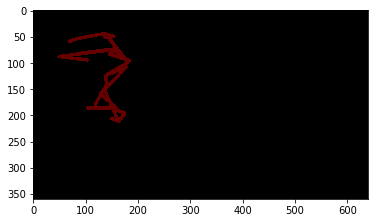

In [45]:
vectors_to_video(denormalized_gen_output,output_path='/home/ubuntu/dance-to-beats/src/model/output_gan.avi',frame_size=(640,360),begin_frame=0,end_frame=199)


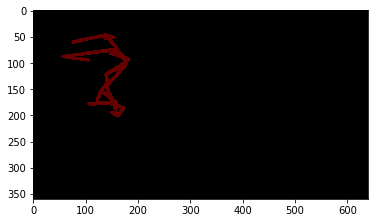

In [47]:
plt.imshow(draw_one_frame(denormalized_gen_output[100]))